In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image
import requests
from io import BytesIO
import xgboost as xgb
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn import metrics
import advertools as adv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import plotly.express as px
import pickle
from xgboost import plot_importance
import plotly.graph_objects as go
import warnings
import optuna
from fitter import Fitter
warnings.filterwarnings('ignore')

C:\Users\Asus\anaconda3\envs\ml\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [163]:
df = pd.read_csv(r"autodata.csv")
df

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME PARENT1  HOME_VAL  \
0       63581743         0  60.0         0  11.0   $67,349      No        $0   
1      132761049         0  43.0         0  11.0   $91,449      No  $257,252   
2      921317019         0  48.0         0  11.0   $52,881      No        $0   
3      727598473         0  35.0         1  10.0   $16,039      No  $124,191   
4      450221861         0  51.0         0  14.0       NaN      No  $306,251   
...          ...       ...   ...       ...   ...       ...     ...       ...   
10297   67790126         1  45.0         2   9.0  $164,669      No  $386,273   
10298   61970712         0  46.0         0   9.0  $107,204      No  $332,591   
10299  849208064         0  48.0         0  15.0   $39,837      No  $170,611   
10300  627828331         0  50.0         0   7.0   $43,445      No  $149,248   
10301  680381960         0  52.0         0  11.0   $53,235      No  $197,017   

      MSTATUS GENDER  ... TIF     CAR_TYPE  RED_CAR OLDCLAIM CLM_FREQ  \
0        z_No      M  ...  11      Minivan      yes   $4,461        2   
1        z_No      M  ...   1      Minivan      yes       $0        0   
2        z_No      M  ...   1          Van      yes       $0        0   
3         Yes    z_F  ...   4        z_SUV       no  $38,690        2   
4         Yes      M  ...   7      Minivan      yes       $0        0   
...       ...    ...  ...  ..          ...      ...      ...      ...   
10297     Yes      M  ...  15      Minivan       no       $0        0   
10298     Yes      M  ...   6  Panel Truck       no       $0        0   
10299     Yes    z_F  ...   7        z_SUV       no       $0        0   
10300     Yes    z_F  ...   6      Minivan       no       $0        0   
10301     Yes    z_F  ...   6      Minivan       no       $0        0   

       REVOKED MVR_PTS CLM_AMT CAR_AGE  CLAIM_FLAG  
0           No       3      $0    18.0           0  
1           No       0      $0     1.0           0  
2           No       2      $0    10.0           0  
3           No       3      $0    10.0           0  
4           No       0      $0     6.0           0  
...        ...     ...     ...     ...         ...  
10297       No       2      $0    17.0           0  
10298       No       0      $0     1.0           0  
10299       No       0      $0     1.0           0  
10300       No       0      $0    11.0           0  
10301       No       0      $0     9.0           0  

[10302 rows x 25 columns]

In [164]:
df.head()

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ   INCOME PARENT1  HOME_VAL  \
0   63581743         0  60.0         0  11.0  $67,349      No        $0   
1  132761049         0  43.0         0  11.0  $91,449      No  $257,252   
2  921317019         0  48.0         0  11.0  $52,881      No        $0   
3  727598473         0  35.0         1  10.0  $16,039      No  $124,191   
4  450221861         0  51.0         0  14.0      NaN      No  $306,251   

  MSTATUS GENDER  ... TIF CAR_TYPE  RED_CAR OLDCLAIM CLM_FREQ  REVOKED  \
0    z_No      M  ...  11  Minivan      yes   $4,461        2       No   
1    z_No      M  ...   1  Minivan      yes       $0        0       No   
2    z_No      M  ...   1      Van      yes       $0        0       No   
3     Yes    z_F  ...   4    z_SUV       no  $38,690        2       No   
4     Yes      M  ...   7  Minivan      yes       $0        0       No   

  MVR_PTS CLM_AMT CAR_AGE  CLAIM_FLAG  
0       3      $0    18.0           0  
1       0      $0     1.0           0  
2       2      $0    10.0           0  
3       3      $0    10.0           0  
4       0      $0     6.0           0  

[5 rows x 25 columns]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

In [52]:
df.describe()

ID      KIDSDRIV           AGE      HOMEKIDS          YOJ  \
count  1.030200e+04  10302.000000  10295.000000  10302.000000  9754.000000   
mean   4.956631e+08      0.169288     44.837397      0.720443    10.474062   
std    2.864675e+08      0.506512      8.606445      1.116323     4.108943   
min    6.317500e+04      0.000000     16.000000      0.000000     0.000000   
25%    2.442869e+08      0.000000     39.000000      0.000000     9.000000   
50%    4.970043e+08      0.000000     45.000000      0.000000    11.000000   
75%    7.394551e+08      0.000000     51.000000      1.000000    13.000000   
max    9.999264e+08      4.000000     81.000000      5.000000    23.000000   

           TRAVTIME           TIF      CLM_FREQ       MVR_PTS      CAR_AGE  \
count  10302.000000  10302.000000  10302.000000  10302.000000  9663.000000   
mean      33.416424      5.329159      0.800718      1.710153     8.298148   
std       15.869687      4.110795      1.154079      2.159015     5.714450   
min        5.000000      1.000000      0.000000      0.000000    -3.000000   
25%       22.000000      1.000000      0.000000      0.000000     1.000000   
50%       33.000000      4.000000      0.000000      1.000000     8.000000   
75%       44.000000      7.000000      2.000000      3.000000    12.000000   
max      142.000000     25.000000      5.000000     13.000000    28.000000   

         CLAIM_FLAG  
count  10302.000000  
mean       0.266550  
std        0.442177  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

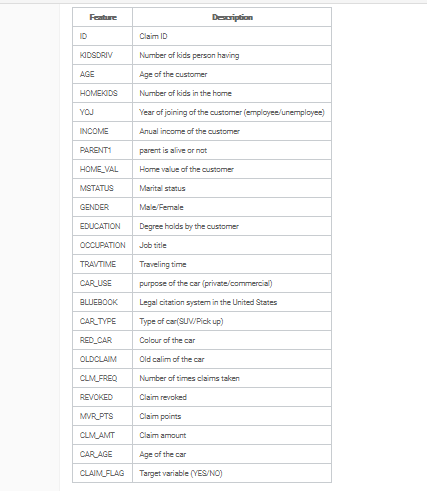

In [53]:
url = "https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2566208%2F50dd4f899017ad7c6ba848cfa513a853%2FScreenshot_2020-04-17%20GreyAtom%20-%20Learning%20Platform(1).png?generation=1587141048165615&alt=media"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [165]:
for i in df:
    if df[i].dtype == "object":
        df[i] = df[i].str.replace("$","")
        df[i] = df[i].str.replace(",","")
        df[i] = df[i].str.replace("z_","")
        try:
            df[i] = df[i].astype("float")
        except:
            pass
df        

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME PARENT1  HOME_VAL  \
0       63581743         0  60.0         0  11.0   67349.0      No       0.0   
1      132761049         0  43.0         0  11.0   91449.0      No  257252.0   
2      921317019         0  48.0         0  11.0   52881.0      No       0.0   
3      727598473         0  35.0         1  10.0   16039.0      No  124191.0   
4      450221861         0  51.0         0  14.0       NaN      No  306251.0   
...          ...       ...   ...       ...   ...       ...     ...       ...   
10297   67790126         1  45.0         2   9.0  164669.0      No  386273.0   
10298   61970712         0  46.0         0   9.0  107204.0      No  332591.0   
10299  849208064         0  48.0         0  15.0   39837.0      No  170611.0   
10300  627828331         0  50.0         0   7.0   43445.0      No  149248.0   
10301  680381960         0  52.0         0  11.0   53235.0      No  197017.0   

      MSTATUS GENDER  ... TIF     CAR_TYPE  RED_CAR OLDCLAIM  CLM_FREQ  \
0          No      M  ...  11      Minivan      yes   4461.0         2   
1          No      M  ...   1      Minivan      yes      0.0         0   
2          No      M  ...   1          Van      yes      0.0         0   
3         Yes      F  ...   4          SUV       no  38690.0         2   
4         Yes      M  ...   7      Minivan      yes      0.0         0   
...       ...    ...  ...  ..          ...      ...      ...       ...   
10297     Yes      M  ...  15      Minivan       no      0.0         0   
10298     Yes      M  ...   6  Panel Truck       no      0.0         0   
10299     Yes      F  ...   7          SUV       no      0.0         0   
10300     Yes      F  ...   6      Minivan       no      0.0         0   
10301     Yes      F  ...   6      Minivan       no      0.0         0   

       REVOKED MVR_PTS CLM_AMT  CAR_AGE  CLAIM_FLAG  
0           No       3     0.0     18.0           0  
1           No       0     0.0      1.0           0  
2           No       2     0.0     10.0           0  
3           No       3     0.0     10.0           0  
4           No       0     0.0      6.0           0  
...        ...     ...     ...      ...         ...  
10297       No       2     0.0     17.0           0  
10298       No       0     0.0      1.0           0  
10299       No       0     0.0      1.0           0  
10300       No       0     0.0     11.0           0  
10301       No       0     0.0      9.0           0  

[10302 rows x 25 columns]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   float64
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   float64
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  float64
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  float64
 19  CLM_FREQ    10302 non-nul

In [166]:
df3 = df.groupby("ID").agg({"CLAIM_FLAG":"sum",
                       "PARENT1":"count"}).reset_index()
df3["FRQ"] = df3.CLAIM_FLAG / df3.PARENT1
df3 = df3[["ID","FRQ"]].sort_values(by= "FRQ",ascending=False)
df4 = df.merge(df3,how="left",on="ID")
df5 = df4.drop(["ID","CLM_AMT","CLAIM_FLAG"],axis=1)
df5

KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME PARENT1  HOME_VAL MSTATUS  \
0             0  60.0         0  11.0   67349.0      No       0.0      No   
1             0  43.0         0  11.0   91449.0      No  257252.0      No   
2             0  48.0         0  11.0   52881.0      No       0.0      No   
3             0  35.0         1  10.0   16039.0      No  124191.0     Yes   
4             0  51.0         0  14.0       NaN      No  306251.0     Yes   
...         ...   ...       ...   ...       ...     ...       ...     ...   
10297         1  45.0         2   9.0  164669.0      No  386273.0     Yes   
10298         0  46.0         0   9.0  107204.0      No  332591.0     Yes   
10299         0  48.0         0  15.0   39837.0      No  170611.0     Yes   
10300         0  50.0         0   7.0   43445.0      No  149248.0     Yes   
10301         0  52.0         0  11.0   53235.0      No  197017.0     Yes   

      GENDER     EDUCATION  ... BLUEBOOK  TIF     CAR_TYPE  RED_CAR  OLDCLAIM  \
0          M           PhD  ...  14230.0   11      Minivan      yes    4461.0   
1          M   High School  ...  14940.0    1      Minivan      yes       0.0   
2          M     Bachelors  ...  21970.0    1          Van      yes       0.0   
3          F   High School  ...   4010.0    4          SUV       no   38690.0   
4          M  <High School  ...  15440.0    7      Minivan      yes       0.0   
...      ...           ...  ...      ...  ...          ...      ...       ...   
10297      M           PhD  ...  13270.0   15      Minivan       no       0.0   
10298      M       Masters  ...  24490.0    6  Panel Truck       no       0.0   
10299      F  <High School  ...  13820.0    7          SUV       no       0.0   
10300      F     Bachelors  ...  22550.0    6      Minivan       no       0.0   
10301      F   High School  ...  19400.0    6      Minivan       no       0.0   

      CLM_FREQ REVOKED  MVR_PTS  CAR_AGE  FRQ  
0            2      No        3     18.0  0.0  
1            0      No        0      1.0  0.0  
2            0      No        2     10.0  0.0  
3            2      No        3     10.0  0.0  
4            0      No        0      6.0  0.0  
...        ...     ...      ...      ...  ...  
10297        0      No        2     17.0  0.0  
10298        0      No        0      1.0  0.0  
10299        0      No        0      1.0  0.0  
10300        0      No        0     11.0  0.0  
10301        0      No        0      9.0  0.0  

[10302 rows x 23 columns]

Fitting 10 distributions:   0%|                                                                 | 0/10 [00:00<?, ?it/s]2023-05-04 16:44:12,912 | INFO | fitter.py:335 | _fit_single_distribution | Fitted expon distribution with error=4873.792113392247)
2023-05-04 16:44:13,604 | INFO | fitter.py:335 | _fit_single_distribution | Fitted cauchy distribution with error=5205.824481177088)
Fitting 10 distributions:  30%|█████████████████                                        | 3/10 [00:01<00:02,  2.55it/s]2023-05-04 16:44:14,022 | INFO | fitter.py:335 | _fit_single_distribution | Fitted norm distribution with error=5128.307707039983)
2023-05-04 16:44:14,171 | INFO | fitter.py:335 | _fit_single_distribution | Fitted chi2 distribution with error=4303.291905357445)
Fitting 10 distributions:  50%|████████████████████████████▌                            | 5/10 [00:01<00:01,  4.47it/s]2023-05-04 16:44:14,197 | INFO | fitter.py:335 | _fit_single_distribution | Fitted rayleigh distribution with error=

sumsquare_error         aic           bic  kl_div  ks_statistic  \
gamma         3151.449606  487.901847 -12174.746442     inf      0.682944   
powerlaw      3712.664354  265.806407 -10486.380156     inf      0.682197   
exponpow      4038.458461  148.176718  -9619.845181     inf      0.682974   
lognorm       4143.175672  504.846934  -9356.118984     inf      0.682933   
chi2          4303.291905  114.085721  -8965.490584     inf      0.682974   

          ks_pvalue  
gamma           0.0  
powerlaw        0.0  
exponpow        0.0  
lognorm         0.0  
chi2            0.0

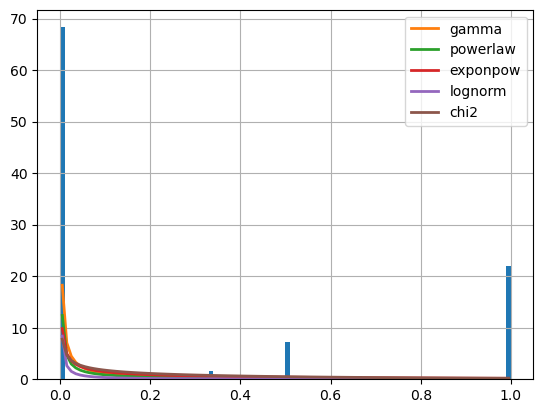

In [57]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(df5.FRQ,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [167]:
X = df5.drop(["FRQ"],axis=1)
y = df5.FRQ

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 43, stratify=df5.FRQ)

p1 = sum(y_train) / len(y_train)
p2 = sum(y_test) / len(y_test)
print(f"Train dataset freq mean : {p1:.2%}")
print(f"Test dataset freq mean : {p2:.2%}")

Train dataset freq mean : 26.66%
Test dataset freq mean : 26.64%


In [168]:
X_train_target_encoded = X_train.copy()
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train_target_encoded, y_train)
X_test = target_encoder.transform(X_test)

In [169]:
def objective(trial):
    """Define the objective function"""

    params = {'objective' : 'count:poisson',
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train_encoded, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    eval_metric_score = y_test.mean() / y_pred.mean() -1   
    return eval_metric_score

# --------------------------------------------------------------------

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-05-04 19:40:19,814] A new study created in memory with name: no-name-82c80f18-0b00-4009-a840-448e0cb3316d
[I 2023-05-04 19:40:21,521] Trial 0 finished with value: 0.5253975687437396 and parameters: {'max_depth': 8, 'learning_rate': 0.942506367331808, 'n_estimators': 120, 'min_child_weight': 3, 'gamma': 4.275976141576023e-05, 'subsample': 0.7684108676193924, 'colsample_bytree': 0.8012309571394375, 'reg_alpha': 7.495977694985086e-05, 'reg_lambda': 0.0003478407354850154}. Best is trial 0 with value: 0.5253975687437396.
[I 2023-05-04 19:40:22,100] Trial 1 finished with value: -0.17871747818864436 and parameters: {'max_depth': 2, 'learning_rate': 0.012351715360848291, 'n_estimators': 227, 'min_child_weight': 8, 'gamma': 0.0004505264918919832, 'subsample': 0.03302764114473524, 'colsample_bytree': 0.24844967781873653, 'reg_alpha': 0.018863678249549605, 'reg_lambda': 0.005384093756680734}. Best is trial 0 with value: 0.5253975687437396.
[I 2023-05-04 19:40:22,388] Trial 2 finished with

Number of finished trials: 20
Best trial:
  Value: 1.2901167260900177
  Params: 
    max_depth: 9
    learning_rate: 0.21423979919936265
    n_estimators: 481
    min_child_weight: 4
    gamma: 4.037244781847264e-05
    subsample: 0.9424257537036836
    colsample_bytree: 0.9786200892079682
    reg_alpha: 4.994919849146274e-05
    reg_lambda: 9.19875635613737e-05


In [170]:
params = trial.params
model_frq = xgb.XGBRegressor(**params)
model_frq.fit(X_train_encoded, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9786200892079682,
             enable_categorical=False, gamma=4.037244781847264e-05, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.21423979919936265, max_delta_step=0, max_depth=9,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=481, n_jobs=4, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=4.994919849146274e-05,
             reg_lambda=9.19875635613737e-05, scale_pos_weight=1,
             subsample=0.9424257537036836, tree_method='exact',
             validate_parameters=1, verbosity=None)

Ortalama Başarı : 0.9909600636860176
Hasarlıların Ortalama Tahmini : 43.13%
Hasarsızların Ortalama Tahmini : 20.29%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

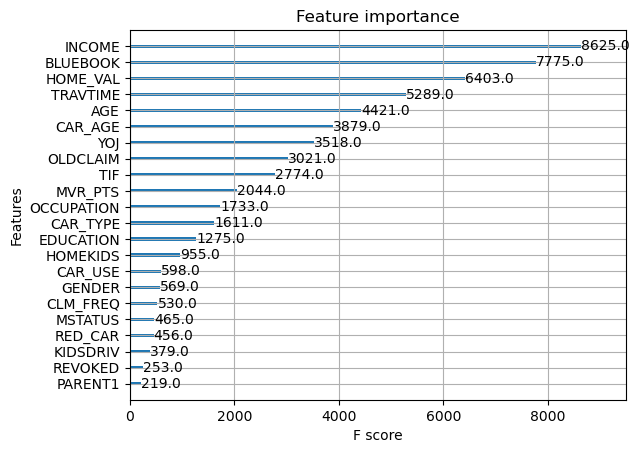

In [171]:
pred = model_frq.predict(X_test)
df_v = pd.DataFrame({"Actual" : y_test,
                     "Pred" : pred})

print(f"Ortalama Başarı : {y_test.mean() / pred.mean()}")
print(f"Hasarlıların Ortalama Tahmini : {df_v[df_v.Actual == 1].Pred.mean():.2%}")
print(f"Hasarsızların Ortalama Tahmini : {df_v[df_v.Actual == 0].Pred.mean():.2%}")
plot_importance(model_frq)

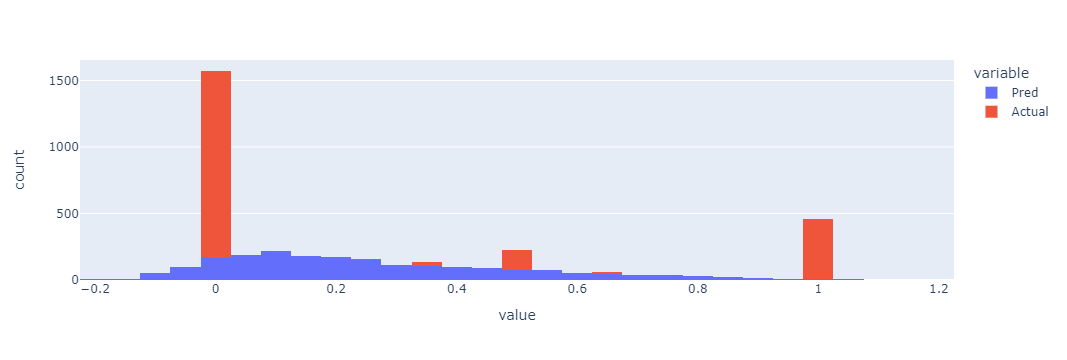

In [172]:
prob_data = pd.DataFrame({"Actual" : y_test,
                          "Pred" : pred})

prob_data2 = prob_data[prob_data.Actual < 10000]
fig = px.histogram(prob_data2, x=["Pred","Actual"])
fig.show()

## Severity

In [173]:
df2 =  pd.read_csv("autodata.csv")

df2 = df2[df2.CLAIM_FLAG == 1]
df = df2.copy()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].str.replace('$' , '')
        df[i] = df[i].str.replace(',' , '')
        try:
            df[i] = df[i].astype(float)
        except:
            pass

df2 = df.copy()

df3 = df2.groupby("ID").agg({"CLAIM_FLAG":"sum",
                             "CLM_AMT" : "sum"}).reset_index()
df3["SEVERITY"] = df3.CLM_AMT / df3.CLAIM_FLAG
df3 = df3[["ID","SEVERITY"]].sort_values(by= "SEVERITY",ascending=False)
df4 = df2.merge(df3,how="left",on="ID")
df5 = df4.drop(["ID","CLM_AMT","CLAIM_FLAG"],axis=1)


df5


KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME PARENT1  HOME_VAL MSTATUS  \
0            0  34.0         1  12.0  125301.0     Yes       0.0    z_No   
1            1  40.0         1  11.0   50815.0     Yes       0.0    z_No   
2            1  37.0         2   NaN  107961.0      No  333680.0     Yes   
3            0  34.0         0  10.0   62978.0      No       0.0    z_No   
4            0  53.0         0  14.0   77100.0      No       0.0    z_No   
...        ...   ...       ...   ...       ...     ...       ...     ...   
2741         0  43.0         0   NaN       0.0      No   55203.0     Yes   
2742         0  46.0         0  10.0   68360.0      No  237457.0    z_No   
2743         0  41.0         0  12.0   92185.0      No  289370.0     Yes   
2744         0  45.0         0  11.0   52966.0      No       0.0    z_No   
2745         0  51.0         0  10.0  128523.0      No       0.0    z_No   

     GENDER      EDUCATION  ... BLUEBOOK  TIF     CAR_TYPE  RED_CAR  OLDCLAIM  \
0       z_F      Bachelors  ...  17430.0    1   Sports Car       no       0.0   
1         M  z_High School  ...  18930.0    6      Minivan       no    3295.0   
2         M      Bachelors  ...  16970.0    1          Van      yes    2374.0   
3       z_F      Bachelors  ...  11200.0    1        z_SUV       no       0.0   
4       z_F        Masters  ...  18300.0    1   Sports Car       no       0.0   
...     ...            ...  ...      ...  ...          ...      ...       ...   
2741    z_F            PhD  ...  24030.0    9      Minivan       no    3035.0   
2742      M      Bachelors  ...  12940.0    1      Minivan       no    6560.0   
2743      M  z_High School  ...   1500.0   11      Minivan      yes       0.0   
2744      M  z_High School  ...  11300.0    6       Pickup      yes   16239.0   
2745      M        Masters  ...  32960.0    6  Panel Truck       no    3995.0   

     CLM_FREQ REVOKED  MVR_PTS  CAR_AGE SEVERITY  
0           0      No        0      7.0   2946.0  
1           1      No        2      1.0   6477.0  
2           1     Yes       10      7.0   8915.5  
3           0      No        0      1.0   2501.0  
4           0      No        0     11.0   6077.0  
...       ...     ...      ...      ...      ...  
2741        4      No        0     14.0    471.0  
2742        3      No        7     11.0   3135.0  
2743        0      No        0     10.0   1815.0  
2744        2     Yes        5      1.0   2967.0  
2745        3      No        1     15.0   3288.0  

[2746 rows x 23 columns]

Fitting 10 distributions:   0%|                                                                 | 0/10 [00:00<?, ?it/s]2023-05-04 19:42:05,760 | INFO | fitter.py:335 | _fit_single_distribution | Fitted expon distribution with error=2.8093103022526218e-08)
2023-05-04 19:42:05,988 | INFO | fitter.py:335 | _fit_single_distribution | Fitted cauchy distribution with error=6.018887844950477e-09)
Fitting 10 distributions:  30%|█████████████████                                        | 3/10 [00:00<00:02,  3.50it/s]2023-05-04 19:42:06,508 | INFO | fitter.py:335 | _fit_single_distribution | Fitted norm distribution with error=4.5525176203309496e-08)
2023-05-04 19:42:06,610 | INFO | fitter.py:335 | _fit_single_distribution | Fitted chi2 distribution with error=2.3520400260636256e-08)
Fitting 10 distributions:  50%|████████████████████████████▌                            | 5/10 [00:00<00:00,  6.09it/s]2023-05-04 19:42:06,632 | INFO | fitter.py:335 | _fit_single_distribution | Fitted rayleigh distr

sumsquare_error          aic           bic  kl_div  ks_statistic  \
cauchy      6.018888e-09  3029.358016 -73704.004935     inf      0.115771   
lognorm     7.458748e-09  3505.847684 -73107.110907     inf      0.092207   
gamma       1.630823e-08  7660.826284 -70958.964616     inf      0.183470   
chi2        2.352040e-08  7349.357544 -69953.383382     inf      0.204729   
expon       2.809310e-08  3926.067551 -69473.458013     inf      0.146642   

             ks_pvalue  
cauchy    1.607739e-32  
lognorm   9.089748e-21  
gamma     2.265595e-81  
chi2     2.117488e-101  
expon     5.305713e-52

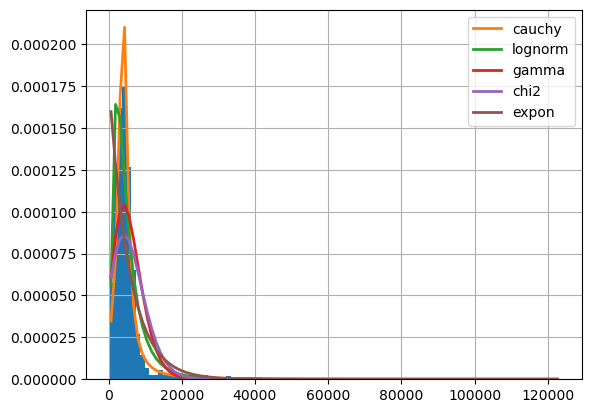

In [174]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(df5.SEVERITY,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [175]:
df = df5.copy()

X = df.drop(["SEVERITY"],axis=1)
y = df.SEVERITY

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 43)

p1 = sum(y_train) / len(y_train)
p2 = sum(y_test) / len(y_test)
print(f"Train dataset SEVERITY mean : {p1}")
print(f"Test dataset SEVERITY mean : {p2}")

Train dataset SEVERITY mean : 5698.605646630236
Test dataset SEVERITY mean : 5554.416363636364


In [176]:
X_train_target_encoded = X_train.copy()
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train_target_encoded, y_train)
X_test = target_encoder.transform(X_test)

In [177]:
def objective(trial):
    """Define the objective function"""

    params = {'objective' : 'reg:gamma',
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train_encoded, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    eval_metric_score = y_test.mean() / y_pred.mean() -1   
    return eval_metric_score

# --------------------------------------------------------------

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-05-04 19:42:23,887] A new study created in memory with name: no-name-f08acf82-79e0-4aa4-b92d-e8730e6e043f
[I 2023-05-04 19:42:24,314] Trial 0 finished with value: 0.040774411356639506 and parameters: {'max_depth': 3, 'learning_rate': 0.04335806886783173, 'n_estimators': 338, 'min_child_weight': 4, 'gamma': 0.003949587850168197, 'subsample': 0.0816506022833855, 'colsample_bytree': 0.014481655196971754, 'reg_alpha': 0.0008487180170010288, 'reg_lambda': 0.0001927767772856857}. Best is trial 0 with value: 0.040774411356639506.
[I 2023-05-04 19:42:24,690] Trial 1 finished with value: 2.716855530077546 and parameters: {'max_depth': 7, 'learning_rate': 0.05406183124817349, 'n_estimators': 159, 'min_child_weight': 4, 'gamma': 1.3547865885356513e-06, 'subsample': 0.025200239504147872, 'colsample_bytree': 0.8432507140577685, 'reg_alpha': 3.509990351777755e-05, 'reg_lambda': 2.516158294064089e-06}. Best is trial 1 with value: 2.716855530077546.
[I 2023-05-04 19:42:24,860] Trial 2 finished

Number of finished trials: 20
Best trial:
  Value: 6680.824882476199
  Params: 
    max_depth: 8
    learning_rate: 0.010168149220099777
    n_estimators: 50
    min_child_weight: 7
    gamma: 1.0826154728945583e-07
    subsample: 0.33665315003646024
    colsample_bytree: 0.010167575934634873
    reg_alpha: 0.0378009534001915
    reg_lambda: 0.007780334784674848


In [178]:
params = trial.params
model_sev = xgb.XGBRegressor(**params)
model_sev.fit(X_train_encoded, y_train)
pred = model_sev.predict(X_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

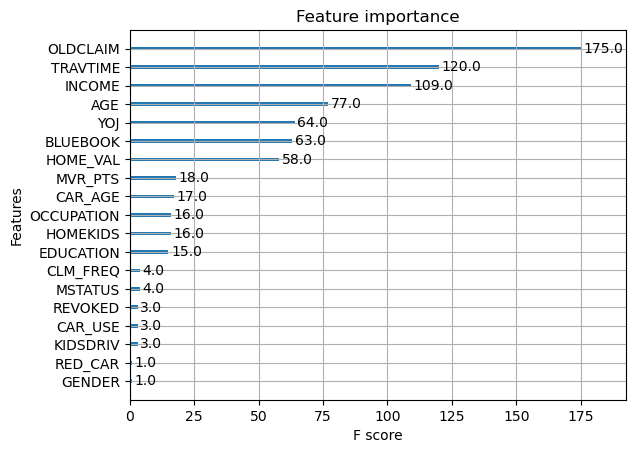

In [179]:
plot_importance(model_sev)

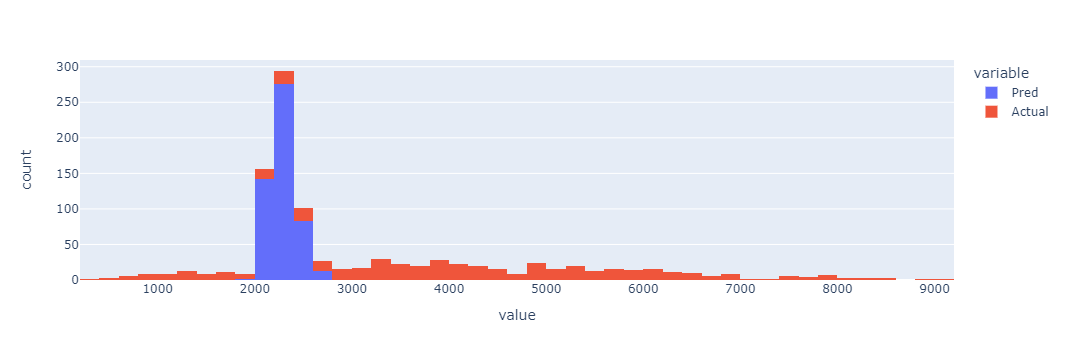

In [180]:
prob_data = pd.DataFrame({"Actual" : y_test,
                          "Pred" : pred})

prob_data2 = prob_data[prob_data.Actual < 10000]
fig = px.histogram(prob_data2, x=["Pred","Actual"])
fig.show()

In [85]:
pred

array([4226.1836, 3907.2295, 3921.9944, 4364.9688, 4133.288 , 3991.6753,
       3968.6223, 4027.6904, 4361.9688, 3843.3572, 4727.3496, 4096.8745,
       4238.4775, 4337.5146, 3915.025 , 3725.5876, 4089.7886, 4029.5588,
       4179.5884, 4408.281 , 4683.82  , 4041.202 , 4094.3115, 4074.0933,
       3873.9602, 4085.3577, 4398.292 , 3757.7737, 3784.0054, 4255.3174,
       3851.6104, 4649.007 , 4523.4272, 4519.3926, 4111.635 , 4265.147 ,
       4665.3984, 3660.9077, 3739.5183, 3755.1978, 4034.6345, 3751.4111,
       3465.792 , 4710.78  , 4067.5964, 4064.8228, 4038.9287, 3827.8462,
       3986.077 , 4206.316 , 3761.4094, 3694.5967, 4511.953 , 3815.0093,
       4288.767 , 3745.3223, 3868.5198, 3557.414 , 4259.078 , 3814.63  ,
       3898.882 , 4516.777 , 4043.5984, 4424.312 , 4118.198 , 3678.552 ,
       4344.005 , 3457.862 , 3993.2505, 4121.981 , 4150.5864, 4241.985 ,
       3706.8804, 4552.539 , 5003.9497, 3771.4177, 3881.9182, 4484.655 ,
       4901.357 , 4678.871 , 3880.9143, 3796.0227, 

In [86]:
y_test

1717     3939.0
2412     4082.5
301      3581.0
2125     3490.0
2179     3432.0
         ...   
1087     2136.0
483      1680.0
1403     3989.0
1978     6988.0
2438    22352.0
Name: SEVERITY, Length: 550, dtype: float64

In [181]:
df_v = pd.DataFrame({"Actual" : y_test,
                     "Pred" : pred})

print(f"Ortalama Başarı : {y_test.mean() / pred.mean()}")


Ortalama Başarı : 2.4310767972733838


## Data Elimination

In [8]:
df = pd.read_csv(r"autodata.csv")
df

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME PARENT1  HOME_VAL  \
0       63581743         0  60.0         0  11.0   $67,349      No        $0   
1      132761049         0  43.0         0  11.0   $91,449      No  $257,252   
2      921317019         0  48.0         0  11.0   $52,881      No        $0   
3      727598473         0  35.0         1  10.0   $16,039      No  $124,191   
4      450221861         0  51.0         0  14.0       NaN      No  $306,251   
...          ...       ...   ...       ...   ...       ...     ...       ...   
10297   67790126         1  45.0         2   9.0  $164,669      No  $386,273   
10298   61970712         0  46.0         0   9.0  $107,204      No  $332,591   
10299  849208064         0  48.0         0  15.0   $39,837      No  $170,611   
10300  627828331         0  50.0         0   7.0   $43,445      No  $149,248   
10301  680381960         0  52.0         0  11.0   $53,235      No  $197,017   

      MSTATUS GENDER  ... TIF     CAR_TYPE  RED_CAR OLDCLAIM CLM_FREQ  \
0        z_No      M  ...  11      Minivan      yes   $4,461        2   
1        z_No      M  ...   1      Minivan      yes       $0        0   
2        z_No      M  ...   1          Van      yes       $0        0   
3         Yes    z_F  ...   4        z_SUV       no  $38,690        2   
4         Yes      M  ...   7      Minivan      yes       $0        0   
...       ...    ...  ...  ..          ...      ...      ...      ...   
10297     Yes      M  ...  15      Minivan       no       $0        0   
10298     Yes      M  ...   6  Panel Truck       no       $0        0   
10299     Yes    z_F  ...   7        z_SUV       no       $0        0   
10300     Yes    z_F  ...   6      Minivan       no       $0        0   
10301     Yes    z_F  ...   6      Minivan       no       $0        0   

       REVOKED MVR_PTS CLM_AMT CAR_AGE  CLAIM_FLAG  
0           No       3      $0    18.0           0  
1           No       0      $0     1.0           0  
2           No       2      $0    10.0           0  
3           No       3      $0    10.0           0  
4           No       0      $0     6.0           0  
...        ...     ...     ...     ...         ...  
10297       No       2      $0    17.0           0  
10298       No       0      $0     1.0           0  
10299       No       0      $0     1.0           0  
10300       No       0      $0    11.0           0  
10301       No       0      $0     9.0           0  

[10302 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

In [9]:
for i in df:
    if df[i].dtype == "object":
        df[i] = df[i].str.replace("$","")
        df[i] = df[i].str.replace(",","")
        df[i] = df[i].str.replace("z_","")
        try:
            df[i] = df[i].astype("float")
        except:
            pass

# High Cardinality
df.drop(labels=["INCOME", "HOME_VAL"],axis=1,inplace=True)

# Imbalance
df.drop(labels=["KIDSDRIV"],axis=1,inplace=True)

# High Cardinality and Imbalance
df.drop(labels=["OLDCLAIM"],axis=1,inplace=True)        

print(df.info())

# df["OCCUPATION"].fillna(df["OCCUPATION"].value_counts().idxmax(), inplace=True)
# df["YOJ"].fillna(df["YOJ"].median(skipna=True), inplace=True)
# df["CAR_AGE"].fillna(df["CAR_AGE"].median(skipna=True), inplace=True)
# df["AGE"].fillna(df["AGE"].median(skipna=True), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   AGE         10295 non-null  float64
 2   HOMEKIDS    10302 non-null  int64  
 3   YOJ         9754 non-null   float64
 4   PARENT1     10302 non-null  object 
 5   MSTATUS     10302 non-null  object 
 6   GENDER      10302 non-null  object 
 7   EDUCATION   10302 non-null  object 
 8   OCCUPATION  9637 non-null   object 
 9   TRAVTIME    10302 non-null  int64  
 10  CAR_USE     10302 non-null  object 
 11  BLUEBOOK    10302 non-null  float64
 12  TIF         10302 non-null  int64  
 13  CAR_TYPE    10302 non-null  object 
 14  RED_CAR     10302 non-null  object 
 15  CLM_FREQ    10302 non-null  int64  
 16  REVOKED     10302 non-null  object 
 17  MVR_PTS     10302 non-null  int64  
 18  CLM_AMT     10302 non-null  float64
 19  CAR_AGE     9663 non-null

In [11]:
df3 = df.groupby("ID").agg({"CLAIM_FLAG":"sum",
                       "BLUEBOOK":"count"}).reset_index()
df3["FRQ"] = df3.CLAIM_FLAG / df3.BLUEBOOK
df3 = df3[["ID","FRQ"]].sort_values(by= "FRQ",ascending=False)
df4 = df.merge(df3,how="left",on="ID")
df5 = df4.drop(["ID","CLM_AMT","CLAIM_FLAG"],axis=1)
df5

AGE  HOMEKIDS   YOJ PARENT1 MSTATUS GENDER     EDUCATION  \
0      60.0         0  11.0      No      No      M           PhD   
1      43.0         0  11.0      No      No      M   High School   
2      48.0         0  11.0      No      No      M     Bachelors   
3      35.0         1  10.0      No     Yes      F   High School   
4      51.0         0  14.0      No     Yes      M  <High School   
...     ...       ...   ...     ...     ...    ...           ...   
10297  45.0         2   9.0      No     Yes      M           PhD   
10298  46.0         0   9.0      No     Yes      M       Masters   
10299  48.0         0  15.0      No     Yes      F  <High School   
10300  50.0         0   7.0      No     Yes      F     Bachelors   
10301  52.0         0  11.0      No     Yes      F   High School   

         OCCUPATION  TRAVTIME     CAR_USE  BLUEBOOK  TIF     CAR_TYPE RED_CAR  \
0      Professional        14     Private   14230.0   11      Minivan     yes   
1       Blue Collar        22  Commercial   14940.0    1      Minivan     yes   
2           Manager        26     Private   21970.0    1          Van     yes   
3          Clerical         5     Private    4010.0    4          SUV      no   
4       Blue Collar        32     Private   15440.0    7      Minivan     yes   
...             ...       ...         ...       ...  ...          ...     ...   
10297       Manager        21     Private   13270.0   15      Minivan      no   
10298           NaN        36  Commercial   24490.0    6  Panel Truck      no   
10299   Blue Collar        12     Private   13820.0    7          SUV      no   
10300    Home Maker        36     Private   22550.0    6      Minivan      no   
10301      Clerical        64     Private   19400.0    6      Minivan      no   

       CLM_FREQ REVOKED  MVR_PTS  CAR_AGE  FRQ  
0             2      No        3     18.0  0.0  
1             0      No        0      1.0  0.0  
2             0      No        2     10.0  0.0  
3             2      No        3     10.0  0.0  
4             0      No        0      6.0  0.0  
...         ...     ...      ...      ...  ...  
10297         0      No        2     17.0  0.0  
10298         0      No        0      1.0  0.0  
10299         0      No        0      1.0  0.0  
10300         0      No        0     11.0  0.0  
10301         0      No        0      9.0  0.0  

[10302 rows x 19 columns]

Fitting 10 distributions:   0%|                                                                 | 0/10 [00:00<?, ?it/s]2023-05-05 18:44:42,364 | INFO | fitter.py:335 | _fit_single_distribution | Fitted expon distribution with error=4873.792113392247)
2023-05-05 18:44:43,186 | INFO | fitter.py:335 | _fit_single_distribution | Fitted cauchy distribution with error=5205.824481177088)
Fitting 10 distributions:  30%|█████████████████                                        | 3/10 [00:01<00:02,  2.37it/s]2023-05-05 18:44:43,614 | INFO | fitter.py:335 | _fit_single_distribution | Fitted norm distribution with error=5128.307707039983)
2023-05-05 18:44:43,718 | INFO | fitter.py:335 | _fit_single_distribution | Fitted chi2 distribution with error=4303.291905357445)
Fitting 10 distributions:  50%|████████████████████████████▌                            | 5/10 [00:01<00:01,  4.43it/s]2023-05-05 18:44:43,753 | INFO | fitter.py:335 | _fit_single_distribution | Fitted rayleigh distribution with error=

sumsquare_error         aic           bic  kl_div  ks_statistic  \
gamma         3151.449606  487.901847 -12174.746442     inf      0.682944   
powerlaw      3712.664354  265.806407 -10486.380156     inf      0.682197   
exponpow      4038.458461  148.176718  -9619.845181     inf      0.682974   
lognorm       4143.175672  504.846934  -9356.118984     inf      0.682933   
chi2          4303.291905  114.085721  -8965.490584     inf      0.682974   

          ks_pvalue  
gamma           0.0  
powerlaw        0.0  
exponpow        0.0  
lognorm         0.0  
chi2            0.0

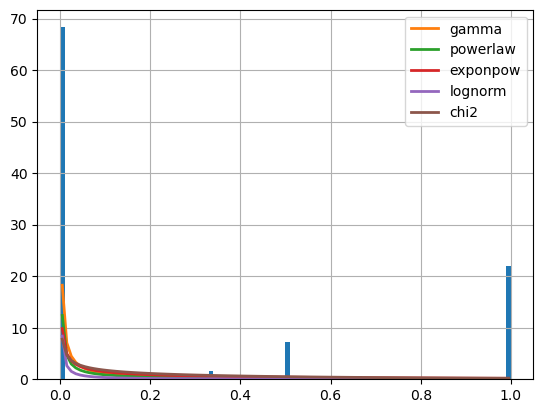

In [709]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(df5.FRQ,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [12]:
X = df5.drop(["FRQ"],axis=1)
y = df5.FRQ

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 43, stratify=df5.FRQ)

p1 = sum(y_train) / len(y_train)
p2 = sum(y_test) / len(y_test)
print(f"Train dataset freq mean : {p1:.2%}")
print(f"Test dataset freq mean : {p2:.2%}")

Train dataset freq mean : 26.66%
Test dataset freq mean : 26.64%


In [13]:
X_train_target_encoded = X_train.copy()
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train_target_encoded, y_train)
X_test = target_encoder.transform(X_test)

In [14]:
def objective(trial):
    """Define the objective function"""

    params = {'objective' : 'count:poisson',
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train_encoded, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    eval_metric_score = y_test.mean() / y_pred.mean() -1   
    return eval_metric_score

# --------------------------------------------------------------------

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-05-15 03:19:01,386] A new study created in memory with name: no-name-02caac1c-c34d-4487-b241-9e525aab4515
[I 2023-05-15 03:19:02,842] Trial 0 finished with value: 0.00031095081300791527 and parameters: {'max_depth': 7, 'learning_rate': 0.1302277732638049, 'n_estimators': 338, 'min_child_weight': 1, 'gamma': 0.4290395647884001, 'subsample': 0.11555594173714326, 'colsample_bytree': 0.12427660767218929, 'reg_alpha': 0.6174735608492247, 'reg_lambda': 0.09176316178167711}. Best is trial 0 with value: 0.00031095081300791527.
[I 2023-05-15 03:19:03,577] Trial 1 finished with value: -0.046848547267223206 and parameters: {'max_depth': 1, 'learning_rate': 0.016501642517004998, 'n_estimators': 341, 'min_child_weight': 4, 'gamma': 0.04853982124089522, 'subsample': 0.026819119134776546, 'colsample_bytree': 0.10824591447310575, 'reg_alpha': 0.002479601015349816, 'reg_lambda': 1.5253701037894532e-06}. Best is trial 0 with value: 0.00031095081300791527.
[I 2023-05-15 03:19:04,311] Trial 2 fini

Number of finished trials: 200
Best trial:
  Value: 2.566929472721814
  Params: 
    max_depth: 9
    learning_rate: 0.9167724441138838
    n_estimators: 473
    min_child_weight: 3
    gamma: 1.2041907490995972e-05
    subsample: 0.995406798451018
    colsample_bytree: 0.5747857157658158
    reg_alpha: 0.0029406594324113506
    reg_lambda: 6.781778334433384e-06


In [15]:
params = trial.params
model_frq = xgb.XGBRegressor(**params)
model_frq.fit(X_train_encoded, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5747857157658158,
             enable_categorical=False, gamma=1.2041907490995972e-05, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.9167724441138838, max_delta_step=0, max_depth=9,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=473, n_jobs=4, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0.0029406594324113506,
             reg_lambda=6.781778334433384e-06, scale_pos_weight=1,
             subsample=0.995406798451018, tree_method='exact',
             validate_parameters=1, verbosity=None)

Ortalama Başarı : 0.982003688465813
Hasarlıların Ortalama Tahmini : 43.24%
Hasarsızların Ortalama Tahmini : 20.97%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

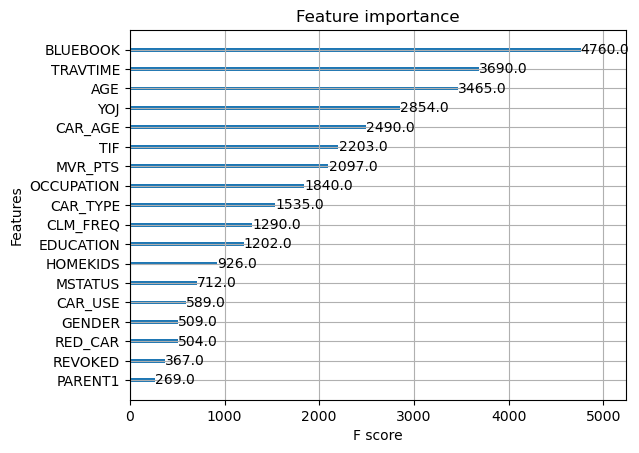

In [16]:
pred = model_frq.predict(X_test)
df_v = pd.DataFrame({"Actual" : y_test,
                     "Pred" : pred})

print(f"Ortalama Başarı : {y_test.mean() / pred.mean()}")
print(f"Hasarlıların Ortalama Tahmini : {df_v[df_v.Actual == 1].Pred.mean():.2%}")
print(f"Hasarsızların Ortalama Tahmini : {df_v[df_v.Actual == 0].Pred.mean():.2%}")
plot_importance(model_frq)

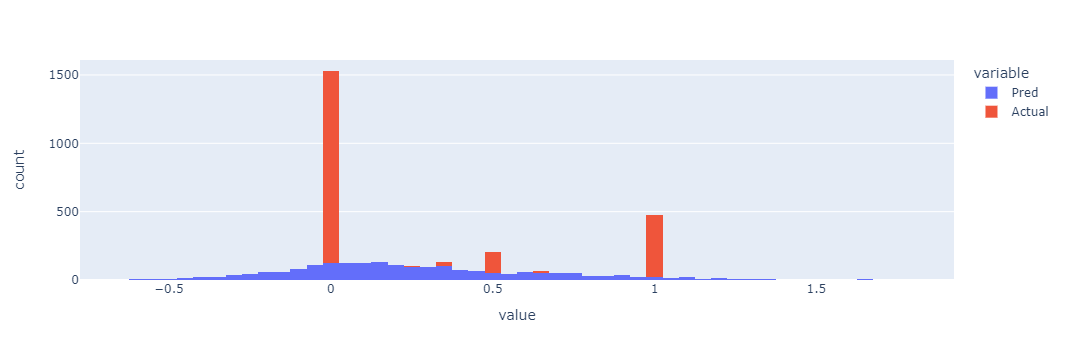

In [17]:
prob_data = pd.DataFrame({"Actual" : y_test,
                          "Pred" : pred})

prob_data2 = prob_data[prob_data.Actual < 10000]
fig = px.histogram(prob_data2, x=["Pred","Actual"])
fig.show()

In [18]:
pickle.dump(model_frq, open('FRQ_Model.sav','wb'))
pickle.dump(target_encoder, open('Target_Encoder_frq.sav','wb'))


## Severity

In [19]:
df2 =  pd.read_csv("autodata.csv")

df2 = df2[df2.CLAIM_FLAG == 1]
df = df2.copy()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].str.replace('$' , '')
        df[i] = df[i].str.replace(',' , '')
        try:
            df[i] = df[i].astype(float)
        except:
            pass

df2 = df.copy()

df3 = df2.groupby("ID").agg({"CLAIM_FLAG":"sum",
                             "CLM_AMT" : "sum"}).reset_index()
df3["SEVERITY"] = df3.CLM_AMT / df3.CLAIM_FLAG
df3 = df3[["ID","SEVERITY"]].sort_values(by= "SEVERITY",ascending=False)
df4 = df2.merge(df3,how="left",on="ID")
df5 = df4.drop(["ID","CLM_AMT","CLAIM_FLAG"],axis=1)

# High Cardinality

df5.drop(labels=["HOME_VAL","INCOME"],axis=1,inplace=True)

# Imbalance

df5.drop(labels=["KIDSDRIV"],axis=1,inplace=True)

# High Cardinality and Imbalance
df5.drop(labels=["OLDCLAIM"],axis=1,inplace=True)

# df5["OCCUPATION"].fillna(df5["OCCUPATION"].value_counts().idxmax(), inplace=True)
# df5["YOJ"].fillna(df5["YOJ"].median(skipna=True), inplace=True)
# df5["CAR_AGE"].fillna(df5["CAR_AGE"].median(skipna=True), inplace=True)
# df5["AGE"].fillna(df5["AGE"].median(skipna=True), inplace=True)
# df5["INCOME"].fillna(df5["INCOME"].median(skipna=True), inplace=True)
# df5["HOME_VAL"].fillna(df5["HOME_VAL"].median(skipna=True), inplace=True)

df5


AGE  HOMEKIDS   YOJ PARENT1 MSTATUS GENDER      EDUCATION  \
0     34.0         1  12.0     Yes    z_No    z_F      Bachelors   
1     40.0         1  11.0     Yes    z_No      M  z_High School   
2     37.0         2   NaN      No     Yes      M      Bachelors   
3     34.0         0  10.0      No    z_No    z_F      Bachelors   
4     53.0         0  14.0      No    z_No    z_F        Masters   
...    ...       ...   ...     ...     ...    ...            ...   
2741  43.0         0   NaN      No     Yes    z_F            PhD   
2742  46.0         0  10.0      No    z_No      M      Bachelors   
2743  41.0         0  12.0      No     Yes      M  z_High School   
2744  45.0         0  11.0      No    z_No      M  z_High School   
2745  51.0         0  10.0      No    z_No      M        Masters   

         OCCUPATION  TRAVTIME     CAR_USE  BLUEBOOK  TIF     CAR_TYPE RED_CAR  \
0     z_Blue Collar        46  Commercial   17430.0    1   Sports Car      no   
1           Manager        21     Private   18930.0    6      Minivan      no   
2     z_Blue Collar        44  Commercial   16970.0    1          Van     yes   
3          Clerical        34     Private   11200.0    1        z_SUV      no   
4            Lawyer        15     Private   18300.0    1   Sports Car      no   
...             ...       ...         ...       ...  ...          ...     ...   
2741     Home Maker        29     Private   24030.0    9      Minivan      no   
2742  z_Blue Collar        49  Commercial   12940.0    1      Minivan      no   
2743   Professional        24     Private    1500.0   11      Minivan     yes   
2744   Professional        16  Commercial   11300.0    6       Pickup     yes   
2745            NaN        18  Commercial   32960.0    6  Panel Truck      no   

      CLM_FREQ REVOKED  MVR_PTS  CAR_AGE  SEVERITY  
0            0      No        0      7.0    2946.0  
1            1      No        2      1.0    6477.0  
2            1     Yes       10      7.0    8915.5  
3            0      No        0      1.0    2501.0  
4            0      No        0     11.0    6077.0  
...        ...     ...      ...      ...       ...  
2741         4      No        0     14.0     471.0  
2742         3      No        7     11.0    3135.0  
2743         0      No        0     10.0    1815.0  
2744         2     Yes        5      1.0    2967.0  
2745         3      No        1     15.0    3288.0  

[2746 rows x 19 columns]

In [149]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2746 entries, 0 to 2745
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         2746 non-null   float64
 1   HOMEKIDS    2746 non-null   int64  
 2   YOJ         2746 non-null   float64
 3   PARENT1     2746 non-null   object 
 4   MSTATUS     2746 non-null   object 
 5   GENDER      2746 non-null   object 
 6   EDUCATION   2746 non-null   object 
 7   OCCUPATION  2746 non-null   object 
 8   TRAVTIME    2746 non-null   int64  
 9   CAR_USE     2746 non-null   object 
 10  BLUEBOOK    2746 non-null   float64
 11  TIF         2746 non-null   int64  
 12  CAR_TYPE    2746 non-null   object 
 13  RED_CAR     2746 non-null   object 
 14  CLM_FREQ    2746 non-null   int64  
 15  REVOKED     2746 non-null   object 
 16  MVR_PTS     2746 non-null   int64  
 17  CAR_AGE     2746 non-null   float64
 18  SEVERITY    2746 non-null   float64
dtypes: float64(5), int64(5), ob

Fitting 10 distributions:   0%|                                                                 | 0/10 [00:00<?, ?it/s]2023-05-05 23:56:15,510 | INFO | fitter.py:335 | _fit_single_distribution | Fitted expon distribution with error=2.8093103022526218e-08)
2023-05-05 23:56:15,708 | INFO | fitter.py:335 | _fit_single_distribution | Fitted cauchy distribution with error=6.018887844950477e-09)
Fitting 10 distributions:  30%|█████████████████                                        | 3/10 [00:00<00:01,  3.59it/s]2023-05-05 23:56:16,191 | INFO | fitter.py:335 | _fit_single_distribution | Fitted norm distribution with error=4.5525176203309496e-08)
2023-05-05 23:56:16,291 | INFO | fitter.py:335 | _fit_single_distribution | Fitted chi2 distribution with error=2.3520400260636256e-08)
Fitting 10 distributions:  50%|████████████████████████████▌                            | 5/10 [00:00<00:00,  6.30it/s]2023-05-05 23:56:16,320 | INFO | fitter.py:335 | _fit_single_distribution | Fitted rayleigh distr

sumsquare_error          aic           bic  kl_div  ks_statistic  \
cauchy      6.018888e-09  3029.358016 -73704.004935     inf      0.115771   
lognorm     7.458748e-09  3505.847684 -73107.110907     inf      0.092207   
gamma       1.630823e-08  7660.826284 -70958.964616     inf      0.183470   
chi2        2.352040e-08  7349.357544 -69953.383382     inf      0.204729   
expon       2.809310e-08  3926.067551 -69473.458013     inf      0.146642   

             ks_pvalue  
cauchy    1.607739e-32  
lognorm   9.089748e-21  
gamma     2.265595e-81  
chi2     2.117488e-101  
expon     5.305713e-52

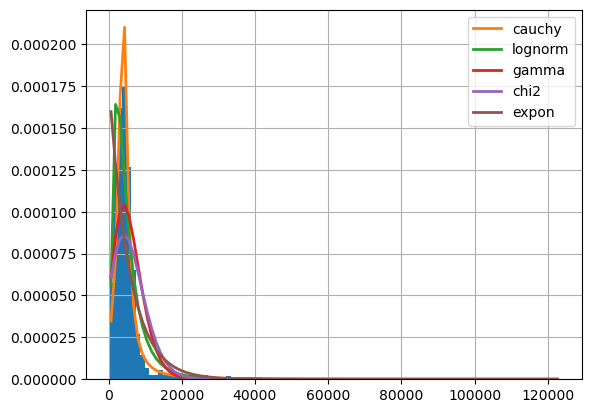

In [36]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(df5.SEVERITY,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [20]:
df = df5.copy()

X = df.drop(["SEVERITY"],axis=1)
y = df.SEVERITY

X_train2 , X_test2 , y_train2 , y_test2 = train_test_split(X,y , test_size = 0.2 , random_state = 43)

p1 = sum(y_train2) / len(y_train2)
p2 = sum(y_test2) / len(y_test2)
print(f"Train dataset SEVERITY mean : {p1}")
print(f"Test dataset SEVERITY mean : {p2}")

Train dataset SEVERITY mean : 5698.605646630236
Test dataset SEVERITY mean : 5554.416363636364


In [21]:
X_train_target_encoded2 = X_train2.copy()
target_encoder = TargetEncoder()
X_train_encoded2 = target_encoder.fit_transform(X_train_target_encoded2, y_train2)
X_test2 = target_encoder.transform(X_test2)

In [22]:
def objective(trial):
    """Define the objective function"""

    params = {'objective' : 'reg:gamma',
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train_encoded2, y_train2)

    # Make predictions
    y_pred2 = optuna_model.predict(X_test2)

    # Evaluate predictions
    eval_metric_score = y_test2.mean() / y_pred2.mean() -1   
    return eval_metric_score

# --------------------------------------------------------------

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-05-15 03:31:00,890] A new study created in memory with name: no-name-7dcfdb42-5d92-48df-87bd-2c05b09ca621
[I 2023-05-15 03:31:01,567] Trial 0 finished with value: 0.050276279976115834 and parameters: {'max_depth': 6, 'learning_rate': 0.07954932740699404, 'n_estimators': 422, 'min_child_weight': 9, 'gamma': 0.00037679138062943885, 'subsample': 0.09460422900044607, 'colsample_bytree': 0.1397243504784517, 'reg_alpha': 1.4481625499910276e-06, 'reg_lambda': 0.0003227033963178537}. Best is trial 0 with value: 0.050276279976115834.
[I 2023-05-15 03:31:02,028] Trial 1 finished with value: 0.20748553517830692 and parameters: {'max_depth': 2, 'learning_rate': 0.02329795196924497, 'n_estimators': 478, 'min_child_weight': 7, 'gamma': 9.626803217916101e-06, 'subsample': 0.04258301354953125, 'colsample_bytree': 0.02274730855412094, 'reg_alpha': 1.5178411628945396e-08, 'reg_lambda': 0.1535687461222417}. Best is trial 1 with value: 0.20748553517830692.
[I 2023-05-15 03:31:02,296] Trial 2 finis

Number of finished trials: 200
Best trial:
  Value: 6715.934772052853
  Params: 
    max_depth: 6
    learning_rate: 0.010063320954314909
    n_estimators: 50
    min_child_weight: 9
    gamma: 2.4520622794695072e-06
    subsample: 0.29851487854881287
    colsample_bytree: 0.47035713367088294
    reg_alpha: 3.3996012684759333e-07
    reg_lambda: 9.53986530935557e-07


In [23]:
params = trial.params
model_sev = xgb.XGBRegressor(**params)
model_sev.fit(X_train_encoded2, y_train2)
pred2 = model_sev.predict(X_test2)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

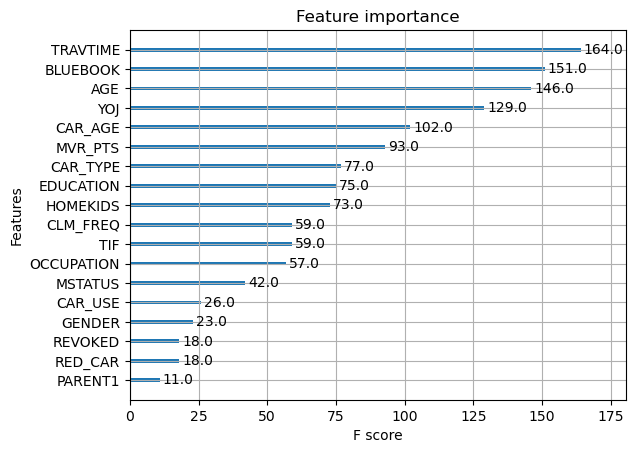

In [24]:
plot_importance(model_sev)

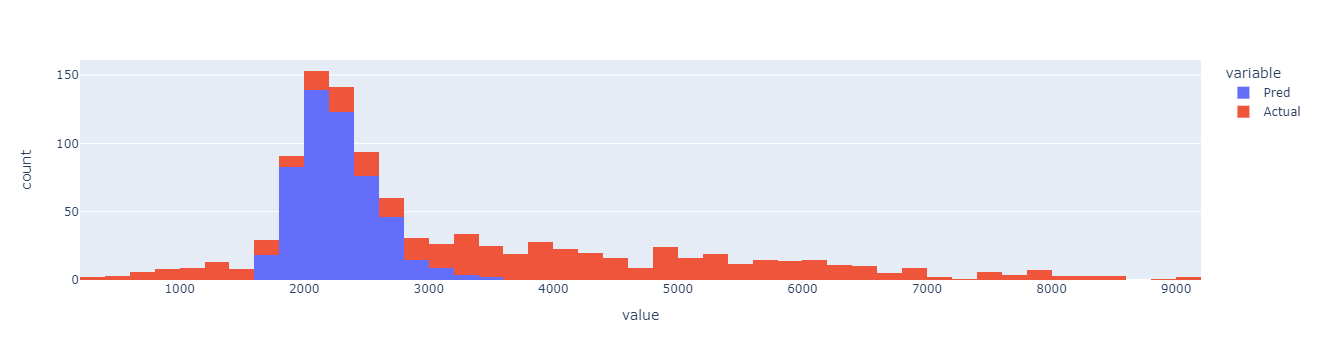

In [25]:
prob_data = pd.DataFrame({"Actual" : y_test2,
                          "Pred" : pred2})

prob_data2 = prob_data[prob_data.Actual < 10000]
fig = px.histogram(prob_data2, x=["Pred","Actual"])
fig.show()

In [26]:
df_v = pd.DataFrame({"Actual" : y_test2,
                     "Pred" : pred2})

print(f"Ortalama Başarı : {y_test2.mean() / pred2.mean()}")


Ortalama Başarı : 2.4359492898499884


In [27]:
pickle.dump(model_sev, open('SEV_Model.sav','wb'))
pickle.dump(target_encoder, open('Target_Encoder_sev.sav','wb'))

In [28]:
# Model import

freq_model = pickle.load(open("FRQ_Model.sav", 'rb'))
sev_model =  pickle.load(open("SEV_Model.sav", 'rb'))
target_sev_model = pickle.load(open("Target_Encoder_sev.sav", 'rb'))
target_frq_model = pickle.load(open("Target_Encoder_frq.sav", 'rb'))

In [29]:
# load the SEV_Model

df2 =  pd.read_csv("autodata.csv")

df2 = df2[df2.CLAIM_FLAG == 1] # We handle only damaged (CLAIM FLAG == 1) datas for severity model.
df = df2.copy()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].str.replace('$' , '')
        df[i] = df[i].str.replace(',' , '')
        df[i] = df[i].str.replace("z_","")
        try:
            df[i] = df[i].astype(float)
        except:
            pass
        
df2 = df.copy()
        
# High Cardinality
df2.drop(labels=["INCOME", "HOME_VAL"],axis=1,inplace=True)

# Imbalance
df2.drop(labels=["KIDSDRIV"],axis=1,inplace=True)

# High Cardinality and Imbalance
df2.drop(labels=["OLDCLAIM"],axis=1,inplace=True)     

# df2["OCCUPATION"].fillna(df2["OCCUPATION"].value_counts().idxmax(), inplace=True)
# df2["YOJ"].fillna(df2["YOJ"].median(skipna=True), inplace=True)
# df2["CAR_AGE"].fillna(df2["CAR_AGE"].median(skipna=True), inplace=True)
# df2["AGE"].fillna(df2["AGE"].median(skipna=True), inplace=True)

df3 = df2.groupby("ID").agg({"CLAIM_FLAG":"sum",
                             "CLM_AMT" : "sum"}).reset_index()
df3["SEVERITY"] = df3.CLM_AMT / df3.CLAIM_FLAG
df3 = df3[["ID","SEVERITY"]].sort_values(by= "SEVERITY",ascending=False)
df4 = df2.merge(df3,how="left",on="ID")

df6 = df2.groupby("ID").agg({"CLAIM_FLAG":"sum",
                       "BLUEBOOK":"count"}).reset_index()
df6["FRQ"] = df6.CLAIM_FLAG / df6.BLUEBOOK
df6 = df6[["ID","FRQ"]].sort_values(by= "FRQ",ascending=False)
df4 = df4.merge(df6,how="left",on="ID")
df5 = df4.drop(["ID","CLM_AMT","CLAIM_FLAG"],axis=1)
df5

df = df5.copy()

df

AGE  HOMEKIDS   YOJ PARENT1 MSTATUS GENDER    EDUCATION    OCCUPATION  \
0     34.0         1  12.0     Yes      No      F    Bachelors   Blue Collar   
1     40.0         1  11.0     Yes      No      M  High School       Manager   
2     37.0         2   NaN      No     Yes      M    Bachelors   Blue Collar   
3     34.0         0  10.0      No      No      F    Bachelors      Clerical   
4     53.0         0  14.0      No      No      F      Masters        Lawyer   
...    ...       ...   ...     ...     ...    ...          ...           ...   
2741  43.0         0   NaN      No     Yes      F          PhD    Home Maker   
2742  46.0         0  10.0      No      No      M    Bachelors   Blue Collar   
2743  41.0         0  12.0      No     Yes      M  High School  Professional   
2744  45.0         0  11.0      No      No      M  High School  Professional   
2745  51.0         0  10.0      No      No      M      Masters           NaN   

      TRAVTIME     CAR_USE  BLUEBOOK  TIF     CAR_TYPE RED_CAR  CLM_FREQ  \
0           46  Commercial   17430.0    1   Sports Car      no         0   
1           21     Private   18930.0    6      Minivan      no         1   
2           44  Commercial   16970.0    1          Van     yes         1   
3           34     Private   11200.0    1          SUV      no         0   
4           15     Private   18300.0    1   Sports Car      no         0   
...        ...         ...       ...  ...          ...     ...       ...   
2741        29     Private   24030.0    9      Minivan      no         4   
2742        49  Commercial   12940.0    1      Minivan      no         3   
2743        24     Private    1500.0   11      Minivan     yes         0   
2744        16  Commercial   11300.0    6       Pickup     yes         2   
2745        18  Commercial   32960.0    6  Panel Truck      no         3   

     REVOKED  MVR_PTS  CAR_AGE  SEVERITY  FRQ  
0         No        0      7.0    2946.0  1.0  
1         No        2      1.0    6477.0  1.0  
2        Yes       10      7.0    8915.5  1.0  
3         No        0      1.0    2501.0  1.0  
4         No        0     11.0    6077.0  1.0  
...      ...      ...      ...       ...  ...  
2741      No        0     14.0     471.0  1.0  
2742      No        7     11.0    3135.0  1.0  
2743      No        0     10.0    1815.0  1.0  
2744     Yes        5      1.0    2967.0  1.0  
2745      No        1     15.0    3288.0  1.0  

[2746 rows x 20 columns]

In [30]:
X = df.drop(["SEVERITY","FRQ"],axis=1)
y = df.SEVERITY

target_encoder = target_sev_model
X = target_encoder.transform(X)

pred_sev = sev_model.predict(X)
pred_sev.shape

# X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 43) 

# p1 = sum(y_train) / len(y_train)
# p2 = sum(y_test) / len(y_test)
# print(f"Train dataset SEVERITY mean : {p1:.2%}")
# print(f"Test dataset SEVERITY mean : {p2:.2%}")


# X_train_target_encoded = X_train.copy()
# target_encoder = target_sev_model
# X_train_encoded = target_encoder.transform(X_train_target_encoded, y_train)

# X_test = target_encoder.transform(X_test)

# pred_sev = sev_model.predict(X_test)
# pred_sev.shape

# pred_frq = freq_model.predict(X_test)
# pred_frq.shape

(2746,)

In [31]:
X = df.drop(["SEVERITY","FRQ"],axis=1)
y = df.FRQ

target_encoder = target_frq_model
X = target_encoder.transform(X)

pred_frq = freq_model.predict(X)
pred_frq.shape

(2746,)

## Pred FRQ X PRED sev = Baz prım hesaplanması (base prim)

In [32]:
base_prim = pred_frq*pred_sev

## Base prim ile toplam ödenen tutar karşılaştırılması

In [33]:
# Toplam ödenen tutar: CLM_AMT.sum() ( Ne kadar yakın çıkarsa o kdar iyi)
df2 = df2[df2.CLAIM_FLAG == 1]

# Severity için oluşturulan X_test deki indexler e denk gelen , X_test oluşturulan dataki CLM_AMT değerleri
# X_test_CLM_AMT = df2.iloc[X_test.index]['CLM_AMT']

In [18]:
# X_test_CLM_AMT - base_prim

4898     687.304443
5712    2499.798584
7122    1415.106323
6006    4414.515991
3961    3348.297852
           ...     
6380    2937.126953
6178    4563.569702
6523    6172.427002
1012    1524.333618
2398    2810.286133
Name: CLM_AMT, Length: 386, dtype: float64

In [34]:
df10 = df2.copy()
df10

ID   AGE  HOMEKIDS   YOJ PARENT1 MSTATUS GENDER    EDUCATION  \
6      871024631  34.0         1  12.0     Yes      No      F    Bachelors   
8        7945239  40.0         1  11.0     Yes      No      M  High School   
10     892208080  37.0         2   NaN      No     Yes      M    Bachelors   
11      77382913  34.0         0  10.0      No      No      F    Bachelors   
13     308455362  53.0         0  14.0      No      No      F      Masters   
...          ...   ...       ...   ...     ...     ...    ...          ...   
10264  903596056  43.0         0   NaN      No     Yes      F          PhD   
10269  384261823  46.0         0  10.0      No      No      M    Bachelors   
10285  542253104  41.0         0  12.0      No     Yes      M  High School   
10287  622965460  45.0         0  11.0      No      No      M  High School   
10293  814422920  51.0         0  10.0      No      No      M      Masters   

         OCCUPATION  TRAVTIME  ... BLUEBOOK  TIF     CAR_TYPE RED_CAR  \
6       Blue Collar        46  ...  17430.0    1   Sports Car      no   
8           Manager        21  ...  18930.0    6      Minivan      no   
10      Blue Collar        44  ...  16970.0    1          Van     yes   
11         Clerical        34  ...  11200.0    1          SUV      no   
13           Lawyer        15  ...  18300.0    1   Sports Car      no   
...             ...       ...  ...      ...  ...          ...     ...   
10264    Home Maker        29  ...  24030.0    9      Minivan      no   
10269   Blue Collar        49  ...  12940.0    1      Minivan      no   
10285  Professional        24  ...   1500.0   11      Minivan     yes   
10287  Professional        16  ...  11300.0    6       Pickup     yes   
10293           NaN        18  ...  32960.0    6  Panel Truck      no   

      CLM_FREQ  REVOKED MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  
6            0       No       0   2946.0      7.0           1  
8            1       No       2   6477.0      1.0           1  
10           1      Yes      10   4021.0      7.0           1  
11           0       No       0   2501.0      1.0           1  
13           0       No       0   6077.0     11.0           1  
...        ...      ...     ...      ...      ...         ...  
10264        4       No       0    471.0     14.0           1  
10269        3       No       7   3135.0     11.0           1  
10285        0       No       0   1815.0     10.0           1  
10287        2      Yes       5   2967.0      1.0           1  
10293        3       No       1   3288.0     15.0           1  

[2746 rows x 21 columns]

In [35]:
df10.CLM_AMT.sum() - base_prim.sum()

10359242.5

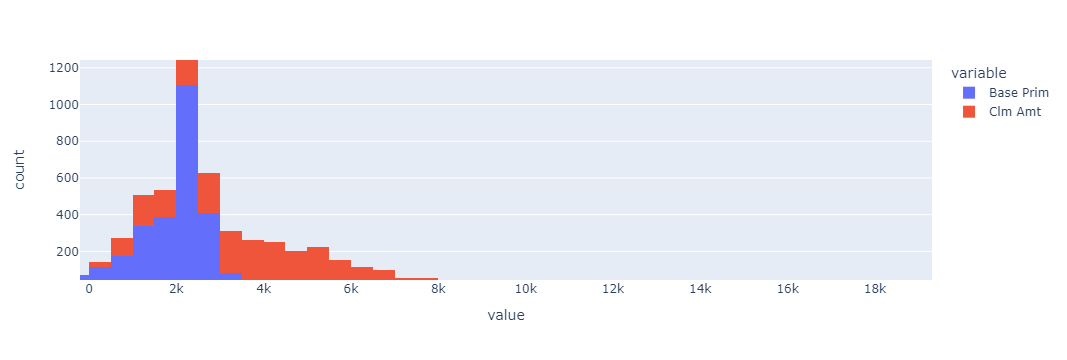

In [36]:
prob_data = pd.DataFrame({"Clm Amt" : df10["CLM_AMT"],
                          "Base Prim" : base_prim})

#prob_data2 = prob_data[prob_data.Actual < 10000]
fig = px.histogram(prob_data, x=["Base Prim","Clm Amt"])
fig.show()

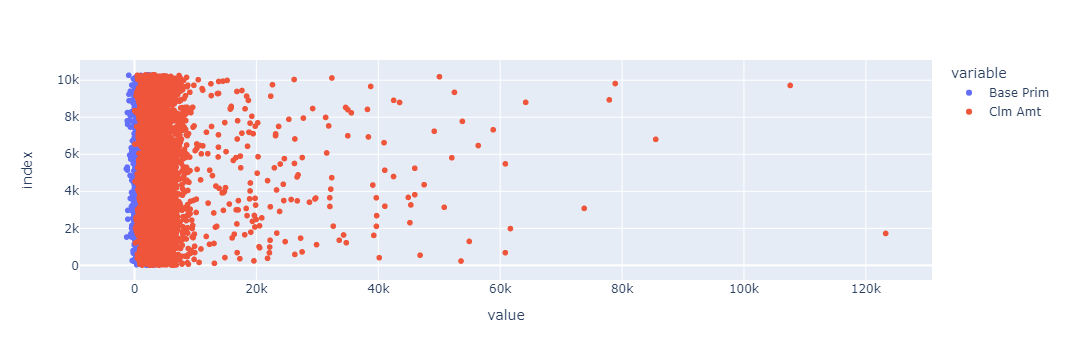

In [37]:
px.scatter(prob_data, x=["Base Prim","Clm Amt"])